# Regression Analysis for Predicting the Compressive Strength of Concrete

# Why should we choose a predictive approach rather than an experimental approach?

One reason to prefer a predictive approach over an experimental approach for evaluating the compressive strength of concrete mixtures is the time and cost involved. The experimental approach can be time-consuming and expensive. It requires setting aside a separate quantity of the concrete mixture to perform the experimental procedure. This involves processes such as hardening the concrete cubes for 24 hours and immersing them underwater for a specific number of days, typically ranging from 7 to 28 days. Finally, a compressive test is conducted, which can be a tedious process.

However, by adopting a predictive approach, we can utilize previously gathered data from experimental testing to approximate the compressive strength. This predictive approach saves time and resources by leveraging the knowledge gained from past experiments. By developing a predictive model based on historical data, we can estimate the compressive strength of future concrete mixtures without going through the extensive experimental procedure.



# 1. Importing the Necessary libraries and the dataset
In this section, we will import the dataset named "concrete.csv" and the necessary libraries to perform the procedure.

In [1]:
import numpy as np

# For Data Frame manipulation
import pandas as pd

# For Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To enable matplot visulization
%matplotlib inline


In [2]:
# The imported csv file(DataFrame) will be stored under the object called concrete
concrete=pd.read_csv('/content/concrete.csv')

# By calling .head() attribute on dataset we will get first 5 rows
concrete.head()


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
# We will call .describe() attribute on the concrete datframe to get basic statistical data about every features on dataframe
concrete.describe()


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
# We will look in to the no.of entries and data types of entries of the dataframe by calling .info() on the object(concrete)
concrete.info()

# This will display a concise summary of the DataFrame, including the number of non-null entries in each column and the data type of each column.
# It provides useful information about the structure and data types present in the DataFrame.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# 2. Data Cleaning
In this section we will normalize the dataset by removing unnescessary data which have no influence on the final output


<Axes: >

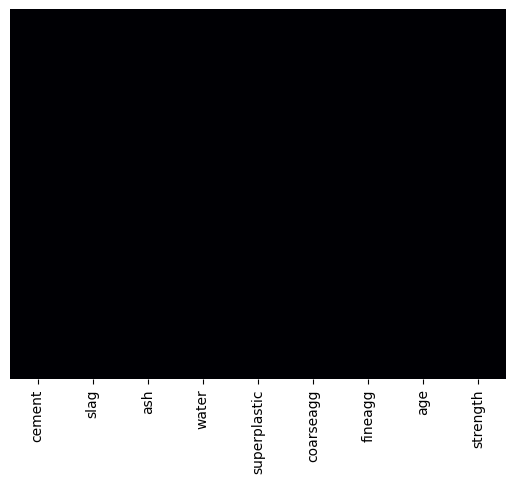

In [5]:
import seaborn as sns

# Create a heatmap to visualize null values
sns.heatmap(concrete.isnull(), yticklabels=False, cbar=False, cmap='magma')


In [6]:
concrete.isnull().sum()


cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

Therefore, we can infer that the dataset does not contain any missing or null values, which is a positive aspect as it allows for more straightforward data analysis and modeling without the need for imputation or handling missing values.






In [7]:
# To examine the features or column names present in the "concrete" DataFrame, you can use the .columns attribute.

concrete.columns


Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [8]:
# To check for duplicate data in the "concrete" DataFrame, you can use the .duplicated() method.

concrete.duplicated().sum()


25

In [9]:
# To check whether entire rows are repeated in the "concrete" DataFrame and obtain a boolean output indicating which rows are duplicates, you can use the .duplicated() method.

duplicates = concrete.duplicated()
duplicates.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [10]:
# To remove duplicated rows from the "concrete" DataFrame, you can use the drop_duplicates()

concrete.drop_duplicates(inplace=True)


In [11]:
# To verify if all duplicates have been removed from the "concrete" DataFrame, you can again check for duplicated rows using the .duplicated().sum()

concrete.duplicated().sum()


0

# 3. Data visualization
In this section we will see if we can get any insigths regarding the features by using graphical representation


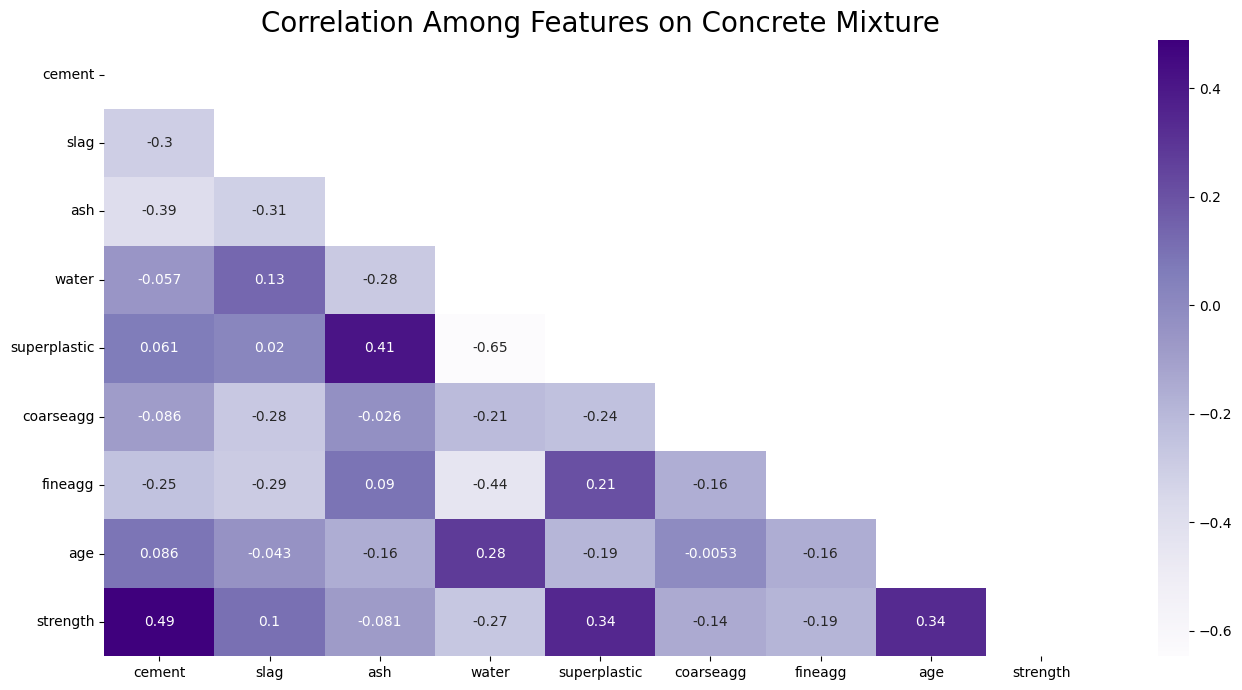

In [12]:
# Create a space and set the graph size
plt.figure(figsize=(16, 8))

# Create a mask to remove values across the heatmap diagonal
mask = np.triu(np.ones_like(concrete.corr()))

# Create a heatmap using seaborn's heatmap function
sns.heatmap(concrete.corr(), annot=True, cmap='Purples', mask=mask)

# Set the title of the plot
plt.title('Correlation Among Features on Concrete Mixture', fontsize=20)

# Display the heatmap
plt.show()


## Inference from Heatmap:

1. Upon analyzing the heatmap, we observe that most of the input features exhibit negative correlation with each other, while only a few are positively correlated. This indicates that when we increase the value of one input feature by one unit, the correlated feature corresponding to that input feature will decrease by one unit, and vice versa for decreasing the feature. This negative correlation suggests an inverse relationship between these features.

2. Similarly, for positively correlated features, increasing one feature by one unit will result in an increase of the correlated feature by one unit, and vice versa. However, it is important to note that the strength of correlation among the features is not very strong, indicating a relatively weak linear relationship between them.

3. Considering the lack of strong correlations, it may not be necessary to implement interaction terms to improve the accuracy of the base model. Interaction terms are typically used when there are significant interactions or dependencies among the input features, which is not prominently observed in this case.


<Axes: >

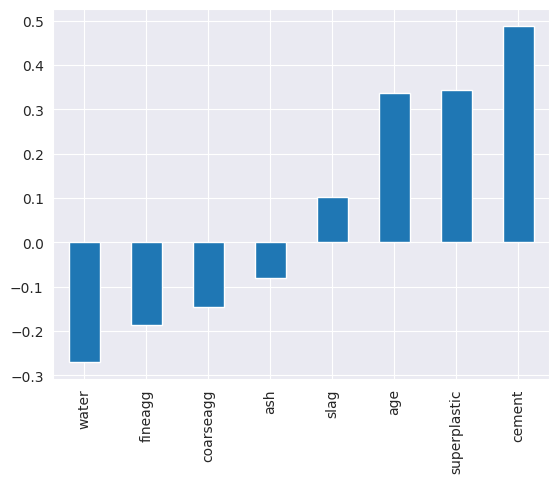

In [13]:
# Set the background style as 'darkgrid'
sns.set_style('darkgrid')

# Create a bar plot of the correlations
concrete.corr()['strength'].sort_values()[:-1].plot(kind='bar')


## Inference from Barplot Correlation:

The bar plot of correlations between the input features and the compressive strength output reveals the following insights:

The features slag, superplasticizer, cement, and age exhibit positive correlations with the compressive strength. Increasing these features tends to increase the compressive strength. However, it is important to note that there are limitations to how much these features can be increased, as concrete requires other ingredients as well.

On the other hand, the features water, fine aggregate, coarse aggregate, and fly ash show negative correlations with the compressive strength. Decreasing these features can potentially increase the compressive strength. However, similar to the positive correlations, there are limits to how much these features can be decreased, as concrete still needs an adequate amount of these ingredients.

Overall, it is important to strike a balance in the quantities of these input features to achieve the desired compressive strength of the concrete mixture. Increasing or decreasing any individual feature indefinitely may not lead to optimal results, as all the ingredients play crucial roles in the composition and properties of concrete.

# Model 1: Linear Regression


## 4. Train Test Split

In the Train Test Split section, we will divide the data into two sets: the training data and the test data. The split will be done in a 70:30 proportion, where 70% of the data will be used for training and 30% will be used for testing.

In [14]:
# Create X variable representing the input features
X = concrete.drop('strength', axis=1)

# Create y variable representing the output feature
y = concrete['strength']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


# 5. Model Building

In [16]:
from sklearn.linear_model import LinearRegression


In [17]:
# We will create an object for linear regression as lr
lr=LinearRegression()

# fit the training data to the linear regression model using the fit() method:

lr.fit(X_train, y_train)


LinearRegression()

In [18]:
lr.coef_


array([ 0.11765422,  0.10065515,  0.08391336, -0.1234702 ,  0.3242327 ,
        0.01906531,  0.02415325,  0.10228679])

In [19]:
df=pd.DataFrame(data=lr.coef_,index=X.columns,columns=['coef'])


In [20]:
df

,coef
cement,0.117654
slag,0.100655
ash,0.083913
water,-0.123470
superplastic,0.324233
coarseagg,0.019065
fineagg,0.024153
age,0.102287


In [21]:
# Predict the output for test data by calling .predict() call

prediction=lr.predict(X_test)


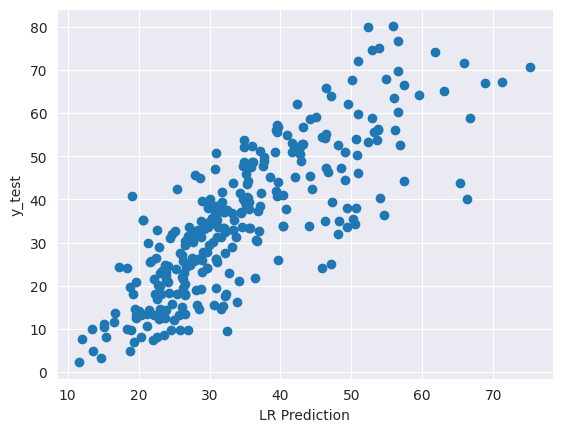

In [22]:
# Create a scatter plot of predicted values versus true test values
plt.scatter(x=prediction, y=y_test)

# Set the x-axis label
plt.xlabel('LR Prediction')

# Set the y-axis label
plt.ylabel('y_test')

# Display the plot
plt.show()


The scatter plot shows the relationship between the predicted values and the true test values. It indicates that there is no strong linear relationship between the predicted values and the true values. This suggests that the accuracy of the model is poor, as the predicted values are not closely aligned with the true test values.



# 6. Model Evaluation

In [23]:
from sklearn.metrics import mean_squared_error,r2_score


In [24]:
print('RMSE',np.sqrt(mean_squared_error(y_test,prediction)))
print('R squared',r2_score(y_test,prediction))


RMSE 9.82810187059905
R squared 0.6533485292319297


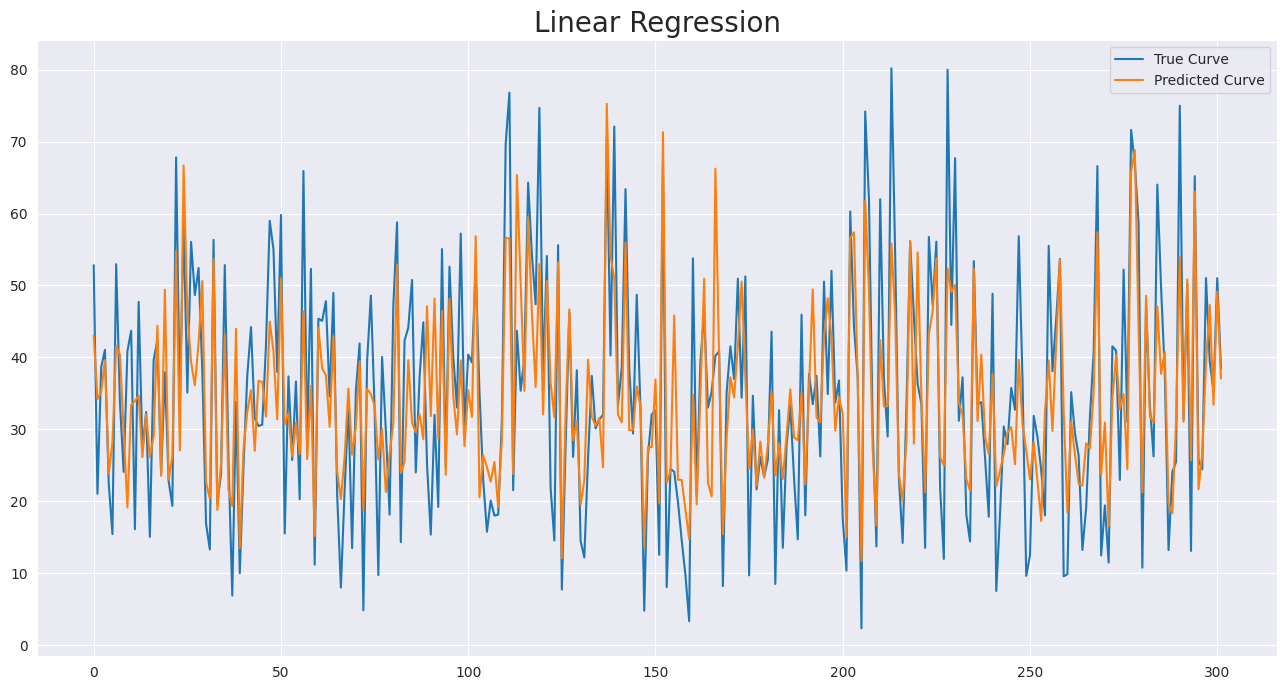

In [25]:
# Set the figure size
plt.figure(figsize=(16, 8))

# Plot the true curve using the test data
plt.plot(np.arange(len(X_test)), y_test.values, label='True Curve')

# Plot the predicted curve using the test data
plt.plot(np.arange(len(X_test)), prediction, label='Predicted Curve')

# Set the title
plt.title('Linear Regression', fontsize=20)

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [26]:
import statsmodels.api as sm


In [27]:
def linear_Regression(x, y):
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    print(model.summary())


In [28]:
linear_Regression(X, y)

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     189.8
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          2.40e-194
Time:                        15:29:18   Log-Likelihood:                -3764.4
No. Observations:                1005   AIC:                             7547.
Df Residuals:                     996   BIC:                             7591.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.9198     26.416     -0.678   

## Inference from the model:

The R-squared value of 60.4% indicates that approximately 60.4% of the variability in the data can be explained by the linear regression model. A higher R-squared value suggests a better fit of the model to the data.

The p-value is an important measure for evaluating the significance of variables. In this model, all the parameters have relatively small p-values, indicating that they are statistically significant and have a relationship with the output variable.

The final expression for the linear regression model is:
compressive strength = -17.918 + (0.01172 x cement) + (0.0995 x slag) + (0.0856 x ash) - (0.1522 x water) + (0.2849 x superplastic) + (0.0157 x coarseagg) + (0.0183 x fineagg) + (0.1122 x age)

In the absence of all parameters, the compressive strength will decrease by 17.918. The negative coefficient of water indicates that an increase in water content will lead to a decrease in compressive strength. The positive coefficients for other parameters (cement, slag, ash, superplastic, coarseagg, fineagg, and age) suggest that an increase in these features will result in an increase in compressive strength.

Overall, the linear regression model provides insights into the relationship between the input features and the compressive strength of the concrete. It helps understand the impact of each feature on the output and provides a basis for predicting the compressive strength based on the given input values.

# Model 2: Random Forest Regression


# Model building without grid search (random parameters)

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf=RandomForestRegressor(n_estimators=60,random_state=42)


In [31]:
rf.fit(X_train,y_train)


RandomForestRegressor(n_estimators=60, random_state=42)

In [32]:
rf_prediction=rf.predict(X_test)


Text(0.5, 1.0, 'Scatter Plot: Random Forest Regression')

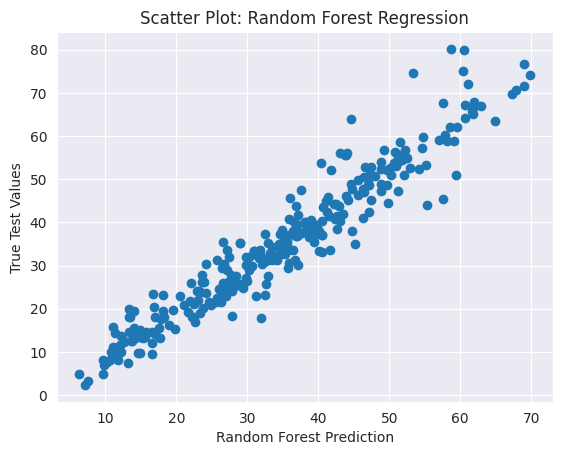

In [33]:
plt.scatter(rf_prediction, y_test)
plt.xlabel('Random Forest Prediction')
plt.ylabel('True Test Values')
plt.title('Scatter Plot: Random Forest Regression')


The scatter plot of the predicted values and true test values exhibits a strong linear relationship, indicating that the model has achieved a good level of accuracy. The closer the points align to a diagonal line, the stronger the correlation between the predicted and true values, suggesting that the model's predictions are close to the actual values. This indicates that the random forest regression model has performed well in predicting the compressive strength of the concrete.

# Model Evaluation

In [34]:
print('RMSE',np.sqrt(mean_squared_error(y_test,rf_prediction)))
print('R squared',r2_score(y_test,rf_prediction))


RMSE 4.8568618388602784
R squared 0.9153425374290369


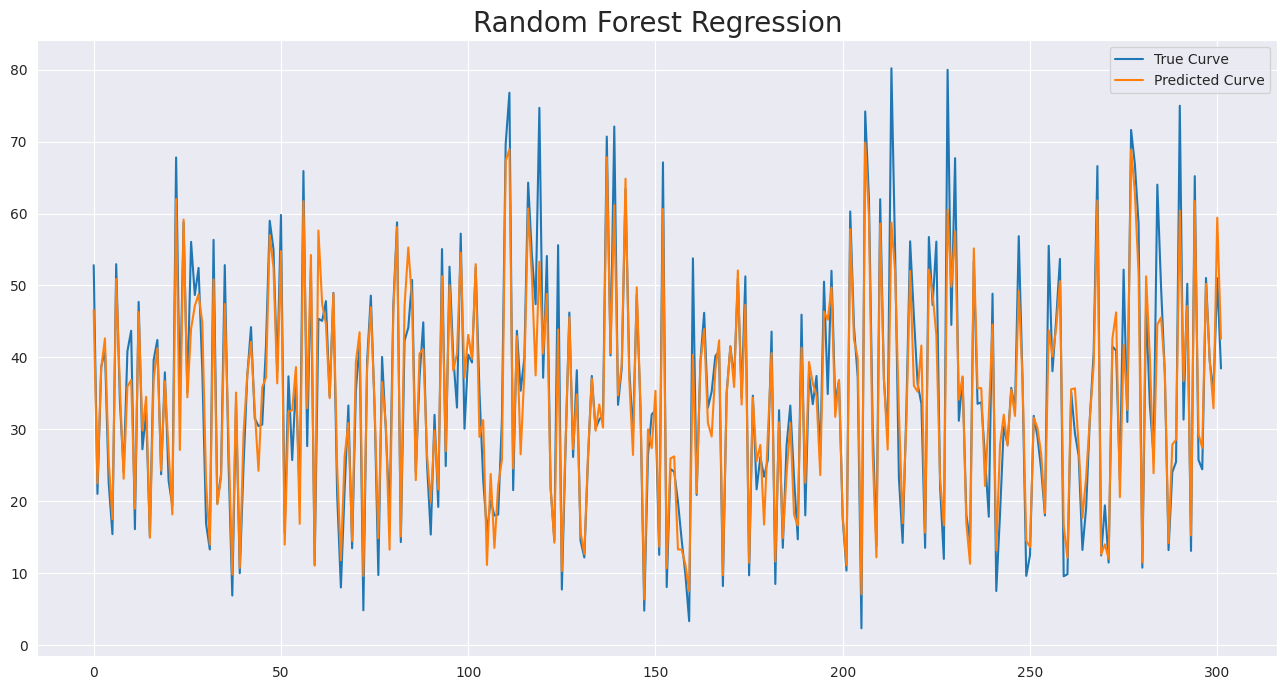

In [35]:
plt.figure(figsize=(16, 8))
plt.plot(np.arange(len(X_test)), y_test.values, label='True Curve')
plt.plot(np.arange(len(X_test)), rf_prediction, label='Predicted Curve')
plt.title('Random Forest Regression', fontsize=20)
plt.legend()


The plot of the true curve and predicted curve obtained from the random forest regression model shows a high degree of overlap, indicating that the variance of the random forest regression model is lower compared to the linear regression model. The close alignment of the curves suggests that the random forest model provides more accurate predictions, as the predicted values closely match the true values. This indicates that the random forest regression model has reduced the variability in predictions and improved the accuracy of the model compared to linear regression.






In [36]:
rf.feature_importances_


array([0.31085523, 0.07626994, 0.02166999, 0.09462969, 0.08498053,
       0.02936319, 0.04177549, 0.34045595])

In [38]:
# create dataframe as f_importance with rf_importance as data for better undestanding
f_importance=pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['value'])

# We will see the dataframe by calling its name
f_importance


,value
cement,0.310855
slag,0.076270
ash,0.021670
water,0.094630
superplastic,0.084981
coarseagg,0.029363
fineagg,0.041775
age,0.340456


As we can see the input feature age and cement are more important than other on predicting compressive strength.


# Model building with grid searched parameters

In [39]:
# Number of trees in random forest
n_estimators = np.arange(50, 500, 25)

# Number of features to consider at every split
max_features = ['sqrt', 'log2']

# Minimum number of samples required to split a node
min_samples_split = [2, 4]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Method of selecting samples for training each tree
bootstrap = [True, False]


In [40]:
param_grid={"n_estimators":n_estimators,
            "max_features":max_features,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf,
            "bootstrap":bootstrap}


In [41]:
rf=RandomForestRegressor()


In [42]:
from sklearn.model_selection import GridSearchCV

# creating an object
rf_grid=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,verbose=2,n_jobs=4)


In [43]:
rf_grid.fit(X_train,y_train)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': array([ 50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350,
       375, 400, 425, 450, 475])},
             verbose=2)

# The expression rf_grid.best_params_ refers to an attribute of a grid search object (rf_grid) in scikit-learn library.

In scikit-learn, grid search is a technique used for hyperparameter tuning, which involves searching for the best combination of hyperparameters for a machine learning model. Grid search exhaustively searches through a specified grid of hyperparameter values to find the optimal combination.

When performing grid search, scikit-learn keeps track of the best set of hyperparameters that yield the highest performance metric (e.g., accuracy, precision, or F1-score) based on cross-validation or other evaluation strategies. The best_params_ attribute stores the set of hyperparameters that resulted in the best performance during the grid search.



In [44]:
rf_grid.best_params_


{'bootstrap': False,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 475}

In [45]:
# Create RandomForestRegressor with best parameters
rf = RandomForestRegressor(bootstrap=False,
                           max_features='log2',
                           min_samples_leaf=1,
                           min_samples_split=4,
                           n_estimators=200)

In [46]:
rf.fit(X_train,y_train)


RandomForestRegressor(bootstrap=False, max_features='log2', min_samples_split=4,
                      n_estimators=200)

In [47]:
pred=rf.predict(X_test)


# Model evaluation

In [48]:
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('R squared',r2_score(y_test,pred))


RMSE 4.805979600182926
R squared 0.9171070502255846


In [49]:
print('R squared value on train data =',rf_grid.score(X_train,y_train))
print('R squared value on test data =',rf_grid.score(X_test,y_test))


R squared value on train data = 0.9915936398358947
R squared value on test data = 0.9181018897430102


The model accuracy comparison between the random parameter and grid-searched parameter models is as follows:

Random Parameter Model: The R-squared value is 91.5%, indicating that approximately 91.5% of the variability in the data can be explained by the Random Forest regression model.

Grid-Searched Parameter Model: The R-squared value is 92.0%, suggesting that approximately 92.0% of the variability in the data can be explained by the Random Forest regression model.

Result: The grid-searched parameter model outperforms the random parameter model, demonstrating better accuracy. Further fine-tuning of the model can be explored by expanding the parameter range in the Random Forest regression.

The use of the bagging technique in Random Forest regression helps to reduce variance and improve accuracy by splitting the data among various decision trees.

# Summary:

In this notebook, we explored two regression models to analyze the relationship between the compressive strength of a concrete mixture and eight other features.

Linear Regression: We initially used linear regression, but it did not fit well as the correlation between features was not strong. Moreover, implementing interaction terms to improve the model's accuracy was not effective.

Random Forest Regression: To overcome the limitations of linear regression, we turned to random forest regression. This model does not require interaction terms and can achieve higher accuracy without strong feature correlations.

By employing random forest regression, we were able to improve the accuracy of our model and better understand the relationship between the features and the compressive strength of the concrete mixture.